#  Exploratory Data Analysis

In [1]:
# 📌 Cell 1 — Load modules manually
import sys
import os
import importlib.util

# Get absolute project root folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

print("Project Root:", project_root)

# Load data_loader.py
loader_path = os.path.join(project_root, "src", "data_loader.py")
spec = importlib.util.spec_from_file_location("data_loader", loader_path)
data_loader = importlib.util.module_from_spec(spec)
spec.loader.exec_module(data_loader)
load_data = data_loader.load_data

# Load eda_processing.py
eda_path = os.path.join(project_root, "src", "data_processing.py")
spec = importlib.util.spec_from_file_location("data_processing", eda_path)
eda = importlib.util.module_from_spec(spec)
spec.loader.exec_module(eda)



Project Root: c:\Users\hp\Desktop\AI projects\bati-bank-credit-scoring


# Load dataset

In [2]:
df = load_data(r"C:\Users\hp\Desktop\AI projects\bati-bank-credit-scoring\data\raw\data.csv")
df.head()
df.info()
df.shape
df.columns.tolist()
df.describe(include='all')
df.dtypes
# df.isnull().sum()
# df.nunique()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

# Overview

In [3]:
overview = eda.dataset_overview(df)
overview
# summary = eda.dataset_summary(df)
# summary

# stats = eda.summary_statistics(df)
# stats

{'shape': (95662, 16),
 'columns': ['TransactionId',
  'BatchId',
  'AccountId',
  'SubscriptionId',
  'CustomerId',
  'CurrencyCode',
  'CountryCode',
  'ProviderId',
  'ProductId',
  'ProductCategory',
  'ChannelId',
  'Amount',
  'Value',
  'TransactionStartTime',
  'PricingStrategy',
  'FraudResult'],
 'dtypes': TransactionId            object
 BatchId                  object
 AccountId                object
 SubscriptionId           object
 CustomerId               object
 CurrencyCode             object
 CountryCode               int64
 ProviderId               object
 ProductId                object
 ProductCategory          object
 ChannelId                object
 Amount                  float64
 Value                     int64
 TransactionStartTime     object
 PricingStrategy           int64
 FraudResult               int64
 dtype: object,
 'head':          TransactionId         BatchId       AccountId       SubscriptionId  \
 0  TransactionId_76871   BatchId_36123  AccountId_

# Summary Stats

In [4]:
eda.summary_statistics(df)


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


# Missing Values

In [5]:
eda.missing_values(df)


,Column,Missing Values,Proportion
0,TransactionId,0,0.0
1,BatchId,0,0.0
2,AccountId,0,0.0
3,SubscriptionId,0,0.0
4,CustomerId,0,0.0
5,CurrencyCode,0,0.0
6,CountryCode,0,0.0
7,ProviderId,0,0.0
8,ProductId,0,0.0
9,ProductCategory,0,0.0


# Plot Distributions

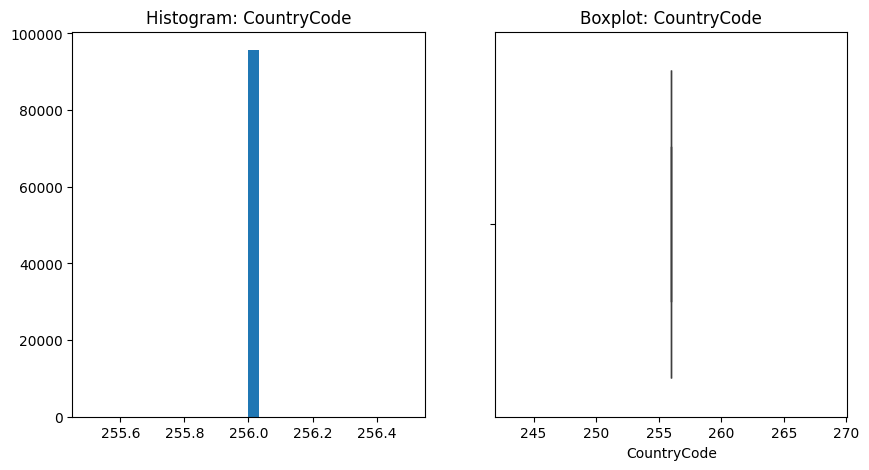

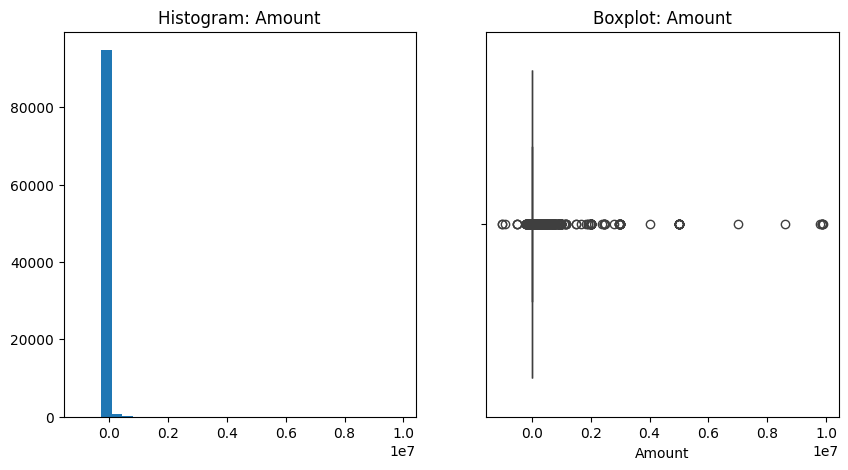

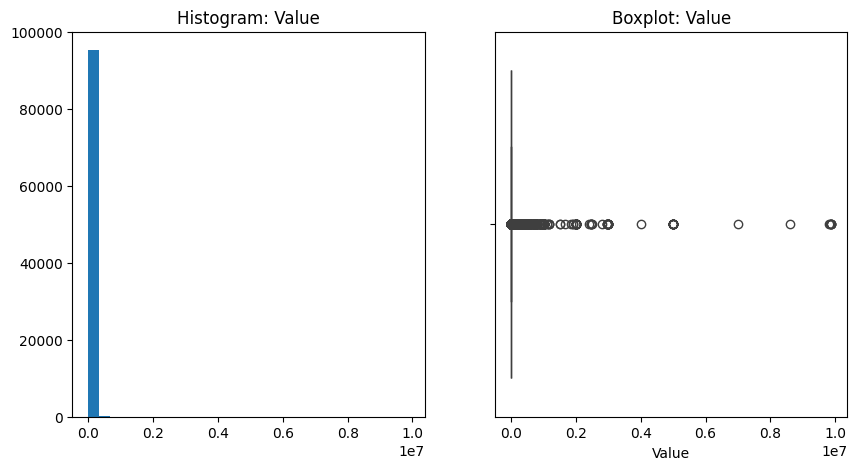

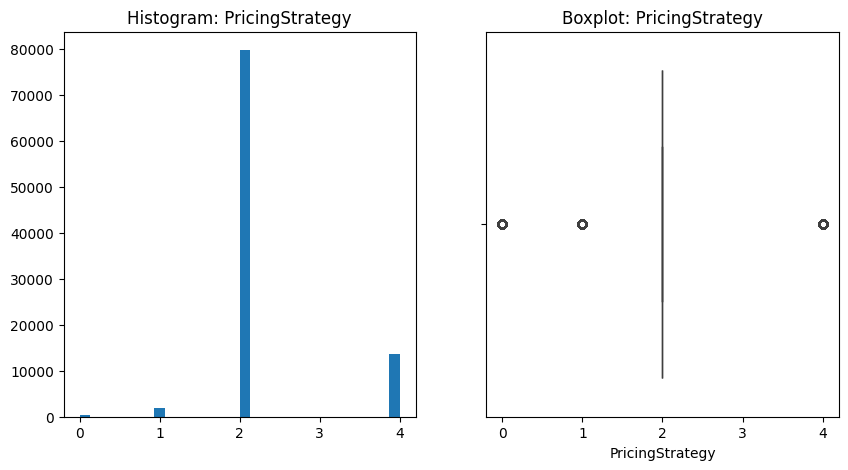

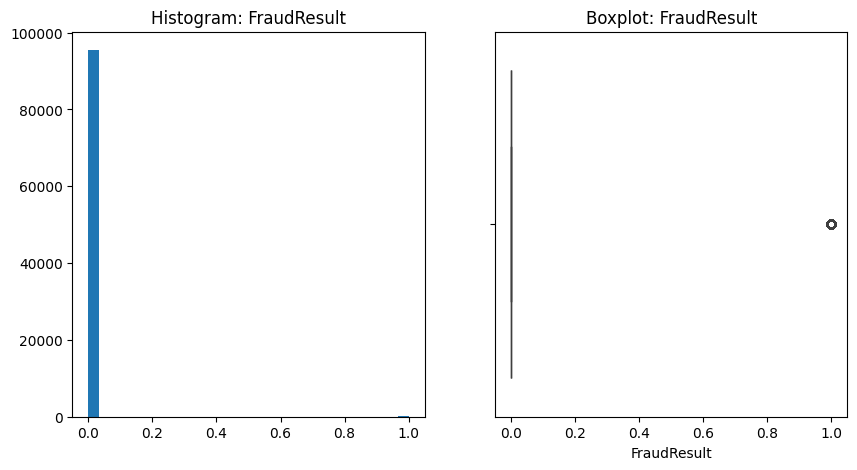

In [6]:
eda.plot_numeric_distributions(df)

# eda.plot_categorical_distributions(df)



# Correlations

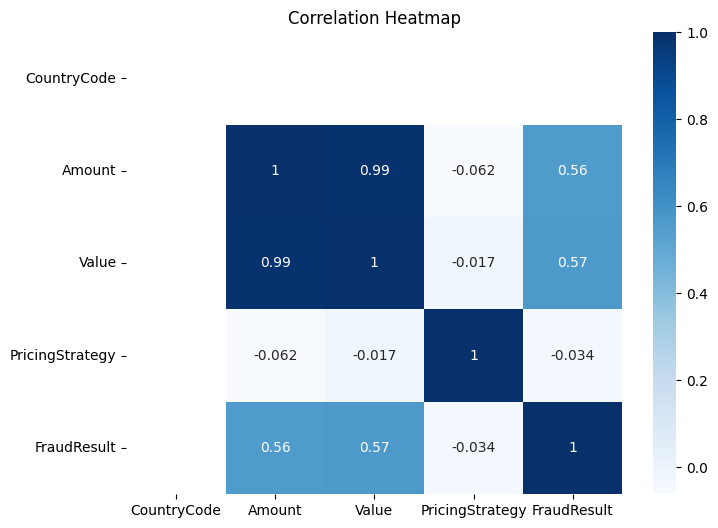

In [7]:
eda.plot_correlation_heatmap(df)


# Outlier detection

In [9]:
numeric_cols = eda.get_numeric_columns(df)

for col in numeric_cols:
    outliers, low, high = eda.detect_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {low}, Upper Bound: {high}")
    print(f"Outliers detected: {len(outliers)}")



Column: CountryCode
Lower Bound: 256.0, Upper Bound: 256.0
Outliers detected: 0

Column: Amount
Lower Bound: -4325.0, Upper Bound: 7075.0
Outliers detected: 24441

Column: Value
Lower Bound: -6812.5, Upper Bound: 12087.5
Outliers detected: 9021

Column: PricingStrategy
Lower Bound: 2.0, Upper Bound: 2.0
Outliers detected: 15814

Column: FraudResult
Lower Bound: 0.0, Upper Bound: 0.0
Outliers detected: 193


🔵 1. CountryCode
Lower Bound: 256.0
Upper Bound: 256.0
Outliers: 0

✔ Interpretation

The CountryCode column seems to contain a constant value (256) for all rows.

Because there is no variation, IQR = 0 → lower and upper bounds both = the same value.

No outliers detected because all values are identical.

✔ Insight

This column contains no useful information for modeling and should likely be removed.

🔵 2. Amount
Lower Bound: -4325
Upper Bound: 7075
Outliers: 24,441

✔ Interpretation

Any Amount > 7,075 or < –4,325 is flagged as an outlier.

24,441 outliers is extremely high → this is a highly skewed feature.

This likely means:

Many transactions are significantly larger than normal.

The distribution is long-tailed.

✔ Insight

This feature will require log transformation or winsorization.

🔵 3. Value
Lower Bound: -6812.5
Upper Bound: 12087.5
Outliers: 9,021

✔ Interpretation

Same issue as Amount: long-tail distribution.

9,021 outliers indicate heavy skew and extreme values.

✔ Insight

Also requires scaling, log transform, or capping extreme values.

🔵 4. PricingStrategy
Lower Bound: 2.0
Upper Bound: 2.0
Outliers: 15,814

✔ Interpretation

All values expected to be exactly 2.

But many rows contain values different from 2, so they are flagged as outliers.

This means the feature has strong class imbalance or unexpected categories.

✔ Insight

Need to inspect unique values.

Possibly data-quality issues or a categorical encoding problem.

🔵 5. FraudResult
Lower Bound: 0.0
Upper Bound: 0.0
Outliers: 193

✔ Interpretation

FraudResult has expected value 0 for most rows (normal).

Values different from 0 (probably 1) are marked outliers.

These “outliers” are actually fraud cases, which are important, NOT errors.

✔ Insight

This is class imbalance → fraud = rare event.

Do NOT remove these “outliers”; they represent your minority class.